In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
%matplotlib inline

# Create Dora

In [2]:
class Dora:
  def __init__(self, data = None, output = None):
    self.snapshots = {}
    self.logs = []
    self.configure(data = data, output = output)

  def configure(self, data = None, output = None):
    if (type(output) is str or type(output) is int):
      self.output = output
    if (type(data) is str):
      self.initial_data = pd.read_csv(data)
      self.data = self.initial_data.copy()
      self.logs = []
    if (type(data) is pd.DataFrame):
      self.initial_data = data
      self.data = self.initial_data.copy()
      self.logs = []

  def remove_feature(self, feature_name):
    del self.data[feature_name]
    self._log("self.remove_feature('{0}')".format(feature_name))

  def extract_feature(self, old_feat, new_feat, mapper):
    new_feature_column = map(mapper, self.data[old_feat])
    self.data[new_feat] = list(new_feature_column)
    self._log("self.extract_feature({0}, {1}, {2})".format(old_feat, new_feat, mapper))

  def impute_missing_values(self):
    column_names = self.input_columns()
    imp = preprocessing.Imputer()
    imp.fit(self.data[column_names])
    self.data[column_names] = imp.transform(self.data[column_names])
    self._log("self.impute_missing_values()")

  def scale_input_values(self):
    column_names = self.input_columns()
    self.data[column_names] = preprocessing.scale(self.data[column_names])
    self._log("self.scale_input_values()")

  def extract_ordinal_feature(self, feature_name):
    feature = self.data[feature_name]
    feature_dictionaries = map(
      lambda x: { str(feature_name): str(x) },
      feature
    )
    vec = DictVectorizer()
    one_hot_matrix = vec.fit_transform(feature_dictionaries).toarray()
    one_hot_matrix = pd.DataFrame(one_hot_matrix)
    one_hot_matrix.columns = vec.get_feature_names()
    self.data = pd.concat(
      [
        self.data,
        one_hot_matrix
      ],
      axis = 1
    )
    del self.data[feature_name]
    self._log("self.extract_ordinal_feature('{0}')".format(feature_name))

  def set_training_and_validation(self):
    training_rows = np.random.rand(len(self.data)) < 0.8
    self.training_data = self.data[training_rows]
    self.validation_data = self.data[~training_rows]

  def plot_feature(self, feature_name):
    x = self.data[feature_name]
    y = self.data[self.output]
    fit = np.polyfit(x, y, deg = 1)
    fig, ax = plt.subplots()
    ax.plot(x, fit[1] + fit[0] * x)
    ax.scatter(x, y)
    ax.set_title("{0} vs. {1}".format(feature_name, self.output))
    fig.show()

  def input_columns(self):
    column_names = list(self.data.columns)
    column_names.remove(self.output)
    return column_names

  def explore(self):
    features = self.input_data().columns
    row_count = math.floor(math.sqrt(len(features)))
    col_count = math.ceil(len(features) / row_count)
    figure = plt.figure(1)

    for index, feature in enumerate(features):
      figure.add_subplot(row_count, col_count, index + 1)
      x = self.data[feature]
      y = self.data[self.output]
      fit = np.polyfit(x, y, deg = 1)
      plt.plot(x, fit[0] * x + fit[1])
      plt.scatter(x, y)
      plt.title("{0} vs. {1}".format(feature, self.output))
    plt.show()

  def snapshot(self, name):
    snapshot = {
      "data": self.data.copy(),
      "logs": self.logs.copy()
    }
    self.snapshots[name] = snapshot

  def use_snapshot(self, name):
    self.data = self.snapshots[name]["data"]
    self.logs = self.snapshots[name]["logs"]

  def _log(self, string):
    self.logs.append(string)

In [71]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [74]:
df = pd.read_csv('default of credit card clients.csv', header =1)

In [4]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,4810,500000,1,3,3,53,0,0,0,0,...,125218,126650,114473,12602,11000,4711,6000,11000,10000,0
1,15096,500000,1,1,3,38,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
2,81,470000,2,3,3,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
3,14889,450000,2,1,3,37,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,11072,450000,1,1,3,37,-2,-2,-2,-2,...,317,1614,324,303,5041,1,1622,325,316,0


In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
dora=Dora()

In [8]:
dora = Dora(output = 'A', data = credit)

In [9]:
dora.data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,4810,500000,1,3,3,53,0,0,0,0,...,125218,126650,114473,12602,11000,4711,6000,11000,10000,0
1,15096,500000,1,1,3,38,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
2,81,470000,2,3,3,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
3,14889,450000,2,1,3,37,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,11072,450000,1,1,3,37,-2,-2,-2,-2,...,317,1614,324,303,5041,1,1622,325,316,0
5,26815,400000,1,1,3,31,1,-1,-1,-1,...,1487,499,499,1731,499,1487,499,499,36983,0
6,26581,360000,2,3,3,58,0,0,0,-2,...,-1,-1,-1,1179,0,0,0,0,139,0
7,6166,360000,2,2,3,42,0,0,0,0,...,259999,265746,259299,16629,9519,9367,10001,9513,9973,0
8,3168,360000,2,2,3,37,0,0,0,-1,...,328,0,770,1052,1002,328,0,770,11309,0
9,16243,360000,2,1,3,35,-2,-2,-2,-2,...,0,0,6920,2570,0,0,0,6920,0,0


In [11]:
dora.remove_feature()

TypeError: remove_feature() missing 1 required positional argument: 'feature_name'

In [12]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


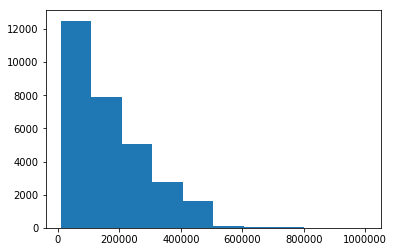

In [14]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

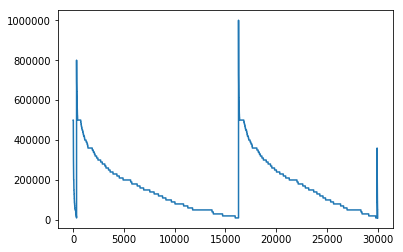

In [15]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [16]:
x = credit['PAY_0']
y = credit['PAY_2']

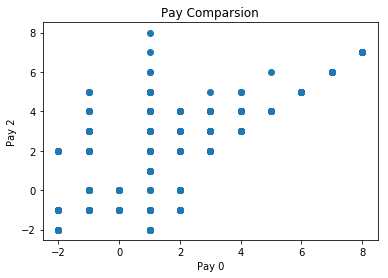

In [17]:
#scatter plot
x = credit.PAY_0
y = credit.PAY_2

plt.scatter(x, y) 
plt.title('Pay Comparsion')
plt.xlabel('Pay 0')
plt.ylabel('Pay 2')
plt.show()

In [18]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


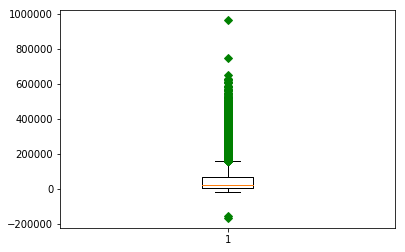

In [19]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [20]:
corr = credit.corr()
print(corr)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.037659   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.231088   
SEX                         0.018497   0.024755  1.000000   0.013627   
EDUCATION                   0.037659  -0.231088  0.013627   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.149134   
AGE                         0.018678   0.144713 -0.090874   0.182434   
PAY_0                      -0.030575  -0.271214 -0.057643   0.112593   
PAY_2                      -0.011215  -0.296382 -0.070771   0.129703   
PAY_3                      -0.018494  -0.286123 -0.066096   0.122425   
PAY_4                      -0.002735  -0.267460 -0.060173   0.116531   
PAY_5                      -0.022199  -0.249411 -0.055064   0.104088   
PAY_6                      -0.020270  -0.235195 -0.044008   0.088986   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.01

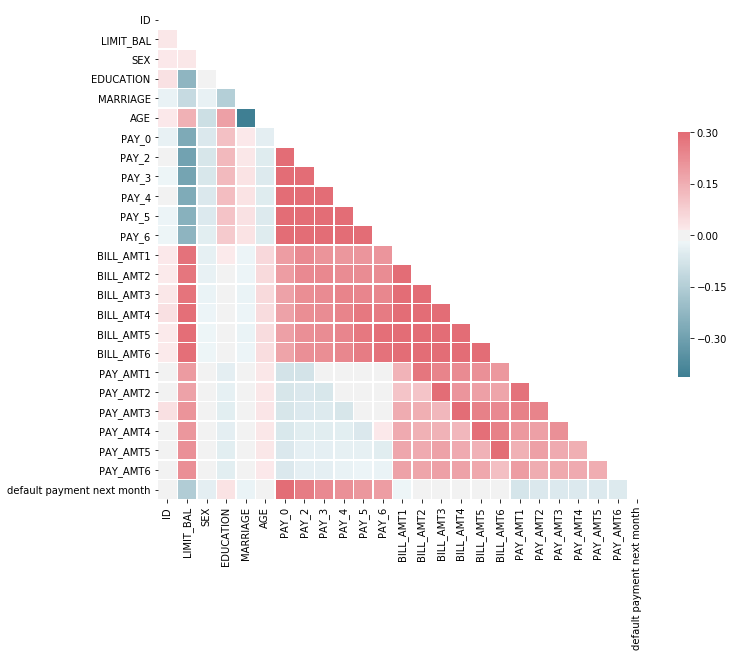

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [22]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.428122e+02 -2.232223e+04     0.004962   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

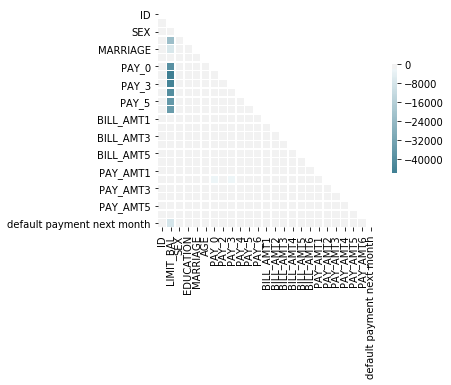

In [23]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(covMat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Education 

In [24]:
# Number of defaults in each education class
credit.groupby('EDUCATION')['default payment next month'].count()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: default payment next month, dtype: int64

In [25]:
# Create a contingency table of 
# education (Graduate school / University / High school /Others) and
# default status (default / non-default)

default_edu_crosstab = pd.crosstab(credit['default payment next month'], 
                                   credit['EDUCATION'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Paid', 1: 'Default', }

# EDUCATION: 
# 1 = graduate school; 2 = university; 3 = high school; 4= others.
new_columns = {1 : 'Graduate school', 
               2 : 'University', 
               3 : 'High school', 
               4 : 'Others'}

default_edu_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_edu_crosstab

EDUCATION,Graduate school,University,High school,Others,All
default payment next month,,,,,
Paid,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


In [26]:
# Create a contingency table of 
# education (Graduate school / University / High school /Others) and
# default status (default / non-default)

default_edu_crosstab_norm_norm = pd.crosstab(credit['default payment next month'], 
                                   credit['EDUCATION'], 
                                   margins=True,
                                   normalize=True)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Paid', 1: 'Default', }

# EDUCATION: 
# 1 = graduate school; 2 = university; 3 = high school; 4= others.
new_columns = {1 : 'Graduate school', 
               2 : 'University', 
               3 : 'High school', 
               4 : 'Others'}

default_edu_crosstab_norm.rename(index=new_index, columns=new_columns, inplace=True)
default_edu_crosstab_norm

NameError: name 'default_edu_crosstab_norm' is not defined

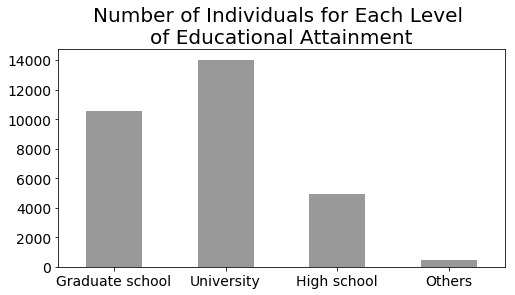

In [27]:
# Plot the number of individuals for 
# each level of educational attainment.
# Normalize

fig, ax = plt.subplots(1, 1)

my_colors = ['0.6']

default_edu_crosstab.loc['All'][0:4].plot.bar(figsize=(8,4), 
                                              rot=0, 
                                              fontsize=14,
                                              color=my_colors, 
                                              ax=ax)

plt.title('Number of Individuals for Each Level \nof Educational Attainment', 
          fontsize=20)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

ax.xaxis.label.set_visible(False)

# Sex


In [28]:
# Number of defaults by sex
credit.groupby('SEX')['default payment next month'].count()

SEX
1    11888
2    18112
Name: default payment next month, dtype: int64

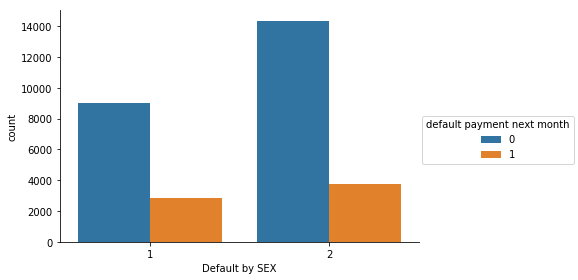

In [29]:
# use seaborn to plot the sex vs default
fg = sns.factorplot('SEX', data=credit, hue='default payment next month', kind='count', aspect=1.5)
fg.set_xlabels('Default by SEX')

In [30]:
# Create a contingency table of 
# gender (male / female) and
# default status (default / non-default)

default_sex_crosstab = pd.crosstab(credit['default payment next month'], 
                                   credit['SEX'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Paid', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Male,Female,All
default payment next month,,,
Paid,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


In [31]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Male,Female,All
default payment next month,,,
Paid,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


# Age 

In [35]:
#bin Age data
credit['AGE'] = pd.cut(credit['AGE'], [20,30,40,50,60,70,80],labels=['20-30','30-40','40-50', '50-60', '60-70','80-70'])

In [36]:
credit.head

<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  PAY_3  \
0       4810     500000    1          3         3  50-60      0      0      0   
1      15096     500000    1          1         3  30-40     -2     -2     -2   
2         81     470000    2          3         3  30-40      0      0      0   
3      14889     450000    2          1         3  30-40      1     -2     -2   
4      11072     450000    1          1         3  30-40     -2     -2     -2   
5      26815     400000    1          1         3  30-40      1     -1     -1   
6      26581     360000    2          3         3  50-60      0      0      0   
7       6166     360000    2          2         3  40-50      0      0      0   
8       3168     360000    2          2         3  30-40      0      0      0   
9      16243     360000    2          1         3  30-40     -2     -2     -2   
10     21208     360000    1          2         3  30-40     -2     -2     -2  

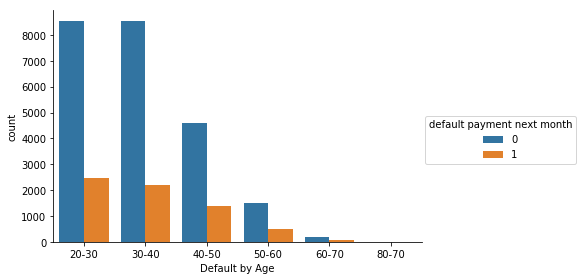

In [37]:
# use seaborn to plot the age vs default
fg = sns.factorplot('AGE', data=credit, hue='default payment next month', kind='count', aspect=1.5)
fg.set_xlabels('Default by Age')

In [38]:

# Create a contingency table of age and
# default status (default / non-default)

default_age_crosstab = pd.crosstab(credit['default payment next month'], 
                                   credit['AGE'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

default_age_crosstab.rename(index=new_index, inplace=True)
default_age_crosstab

AGE,20-30,30-40,40-50,50-60,60-70,80-70,All
default payment next month,,,,,,,
Non-default,8542,8524,4606,1493,189,10,23364
Default,2471,2189,1399,504,68,5,6636
All,11013,10713,6005,1997,257,15,30000


In [41]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_age_crosstab_norm =  round(default_age_crosstab / default_age_crosstab.loc['All'],2)
default_age_crosstab_norm

AGE,20-30,30-40,40-50,50-60,60-70,80-70,All
default payment next month,,,,,,,
Non-default,0.78,0.8,0.77,0.75,0.74,0.67,0.78
Default,0.22,0.2,0.23,0.25,0.26,0.33,0.22
All,1.00,1.0,1.00,1.00,1.00,1.00,1.00


Text(0.5,0,'Age')

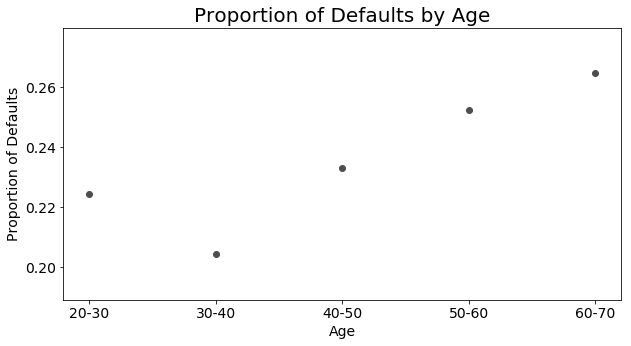

In [42]:

# Plot the proportion of defaults by age, but only
# for ages with at least 50 observations.

my_df = credit.groupby(['AGE', 
                             'default payment next month']).size().unstack()

# Filter out ages with fewer than 50 observations.
my_df = my_df[my_df.sum(axis=1)>50]

# Calculate proportions
my_df = my_df.div(my_df.sum(axis=1), axis='index')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))

my_colors = ['0.3']

ax.scatter(x=my_df.index,
           y=my_df[1], 
           color=my_colors)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.title('Proportion of Defaults by Age', fontsize=20)
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Age', fontsize=14)

# Credit Limit

In [44]:
# Calculate summary statistics for credit limit.

credit['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0.5,0,'Credit Limit')

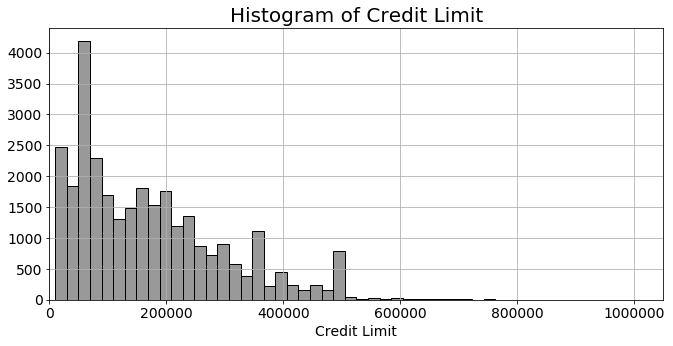

In [45]:

# Plot the a histogram of the number of individuals 
# in each credit limit bin.

fig, ax = plt.subplots(1, 1, figsize=(11,5))

my_colors = ['0.6']

credit['LIMIT_BAL'].hist(bins=50,
                              color=my_colors,
                              ax=ax, 
                              ec='k',
                              lw=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Histogram of Credit Limit', 
      fontsize=20)
plt.xlabel('Credit Limit', fontsize=14)

In [46]:
# Define a generator that yields a range of floating point numbers.
# This will be used for binning below.

def float_range(start, stop, step=1.0):
    '''Generator that yields a range of floating point numbers'''
    while start < stop:
        yield start
        start +=step

Text(0.5,0,'Credit Limit')

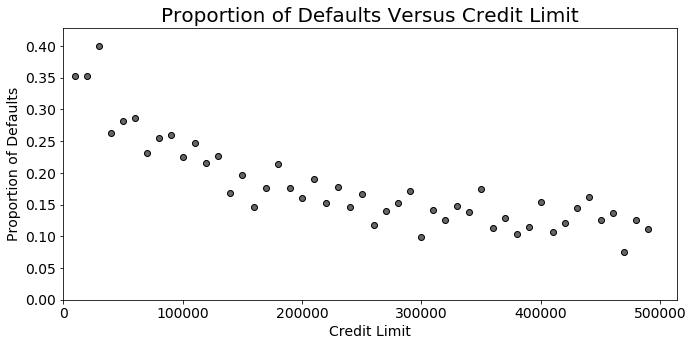

In [47]:
# Plot the proportion of defaults for each 
# credit limit bin.

# Create a list to bin credit limit observations
# The bin size is 10,000 Taiwan New Dollars.

step = 10000
start = round((credit['LIMIT_BAL'].min()), -4)
stop = round((credit['LIMIT_BAL'].max() + step), -4)
        
bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

# Bin the data

credit_copy = credit.copy()

categories = pd.cut(credit_copy['LIMIT_BAL'], 
                    bins=bins, 
                    labels=group_names)

credit_copy['LIMIT_BAL_BINNED'] = categories

my_df = credit_copy.groupby(['LIMIT_BAL_BINNED',
                                    'default payment next month']).size().unstack()

# Require at least 50 total observations per age
my_df = my_df[my_df.sum(axis=1)>50]

my_df = my_df.div(my_df.sum(axis=1), axis='index')
my_df.sort_index(ascending=False, inplace=True)

# Plot 

fig, ax = plt.subplots(1, 1, figsize=(11,5))

my_colors = ['0.4']

plt.scatter(x=my_df.index, y=my_df[1],
            c=my_colors,  
            edgecolors='k', 
            linewidths=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))


for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Credit Limit', 
          fontsize=20)    
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Credit Limit', fontsize=14)


# Payment History


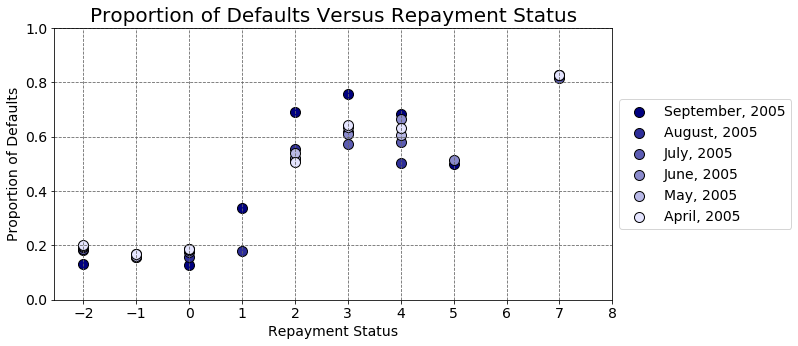

In [49]:
pay_list =['PAY_0',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']


label_dict ={'PAY_0': 'September, 2005', 
             'PAY_2': 'August, 2005', 
             'PAY_3': 'July, 2005', 
             'PAY_4': 'June, 2005',  
             'PAY_5': 'May, 2005',  
             'PAY_6': 'April, 2005'}

pay_dfs = {}

for item in pay_list:
    pay_dfs[item] = credit.groupby([item, 'default payment next month']).size().unstack()
    # Require at least 50 total observations
    
    pay_dfs[item] = pay_dfs[item][pay_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    pay_dfs[item] = pay_dfs[item].div(pay_dfs[item].sum(axis=1), axis='index')
    pay_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in pay_list:
    ax.scatter(x=pay_dfs[item].index, 
               y=pay_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 1])

ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]#, 9]
plt.xticks(ticks, rotation=0)
#plt.xticks(x, labels, rotation='vertical')

ax.xaxis.set_ticks(ticks=ticks, minor=False)

ax.grid(b=True, which='major', color='0.4', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
plt.title('Proportion of Defaults Versus Repayment Status', 
          fontsize=20)    
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Repayment Status', fontsize=14)
    
plt.show()

# Bill History 

Text(0.5,0,'Ratio of ((Bill Amount - Pay Amount) / Credit Limit)')

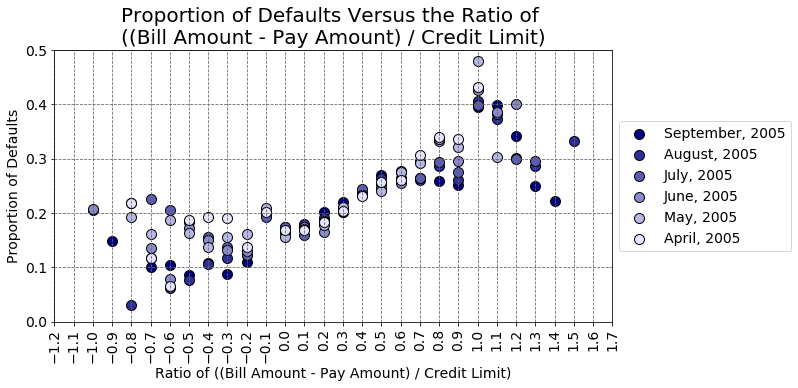

In [50]:
bill_amt_list =['BILL_AMT1', 
                'BILL_AMT2', 
                'BILL_AMT3', 
                'BILL_AMT4', 
                'BILL_AMT5', 
                'BILL_AMT6']

bill_pay_dict ={'BILL_AMT1': 'PAY_AMT1',  
                'BILL_AMT2': 'PAY_AMT2', 
                'BILL_AMT3': 'PAY_AMT3',  
                'BILL_AMT4': 'PAY_AMT4',  
                'BILL_AMT5': 'PAY_AMT5', 
                'BILL_AMT6': 'PAY_AMT6'}

label_dict ={'BILL_AMT1': 'September, 2005',  
             'BILL_AMT2': 'August, 2005',
             'BILL_AMT3': 'July, 2005', 
             'BILL_AMT4': 'June, 2005',  
             'BILL_AMT5': 'May, 2005', 
             'BILL_AMT6': 'April, 2005'}

c_dict ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL',  
         'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL', 
         'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL',  
         'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL', 
         'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL',  
         'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL'}

c_dict_binned ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}

credit_copy = credit.copy()

for item in bill_amt_list:
    credit_copy[c_dict.get(item)] = (credit_copy[item] - credit_copy[bill_pay_dict.get(item)]).div(credit_copy['LIMIT_BAL'],
                                                                                                                  axis='index')

min_set = set()
max_set = set()

for item in bill_amt_list:
    min_set.add(credit_copy[c_dict.get(item)].min())
    max_set.add(credit_copy[c_dict.get(item)].max())
    
step = 0.1
    
start = round((min(min_set) - step), 1)
stop = round((max(max_set) + step), 1)

bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

for item in bill_amt_list:
    categories = pd.cut(credit_copy[c_dict.get(item)], 
                        bins=bins, 
                        labels=group_names)
    credit_copy[c_dict_binned.get(item)] = categories

bill_amt_dfs = {}

for item in bill_amt_list:
    bill_amt_dfs[item] = credit_copy.groupby([c_dict_binned.get(item), 
                                                   'default payment next month']).size().unstack()
    # Require at least 50 total observations
    
    bill_amt_dfs[item] = bill_amt_dfs[item][bill_amt_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    bill_amt_dfs[item] = bill_amt_dfs[item].div(bill_amt_dfs[item].sum(axis=1), axis='index')
    bill_amt_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in bill_amt_list:
    ax.scatter(x=bill_amt_dfs[item].index, 
               y=bill_amt_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 0.5])

xmin, xmax = ax.get_xlim()

step = 0.1
start = round((xmin), 1)
stop = round((xmax + step), 1)

ticks = []
for i in float_range(start, stop, step):
    ticks.append(round(i,1))

plt.xticks(ticks, rotation=90)

ax.grid(b=True, which='major', color='0.4', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
plt.title('Proportion of Defaults Versus the Ratio of \n((Bill Amount - Pay Amount) / Credit Limit)', 
          fontsize=20)     
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Ratio of ((Bill Amount - Pay Amount) / Credit Limit)', fontsize=14)

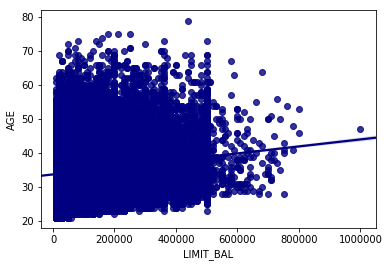

In [57]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["LIMIT_BAL"], y=df["AGE"])
#sns.plt.show()
 

AttributeError: module 'seaborn' has no attribute 'plt'

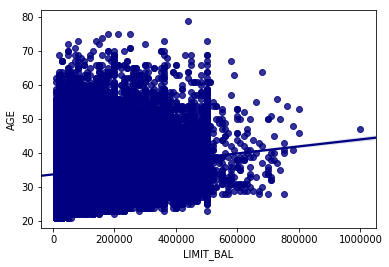

In [61]:
# Without regression fit:
sns.regplot(x=df["LIMIT_BAL"], y=df["AGE"], fit_reg=True)
#sns.plt.show()

Text(0,1,'Overplotting? Sample your data')

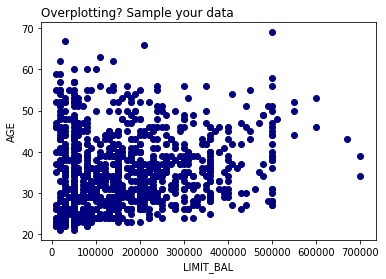

In [56]:
# Sample 1000 random lines
df_sample=df.sample(1000)
 
# Make the plot with this subset
plt.plot( 'LIMIT_BAL', 'AGE', data=df_sample, linestyle='', marker='o')
 
# titles
plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')
plt.title('Overplotting? Sample your data', loc='left')


In [83]:

y = 'LIMIT_BAL'
x = 'AGE'


In [81]:
#df not binned age
#df_b binned age

Text(0.5,1,'Age vs Limit Balance')

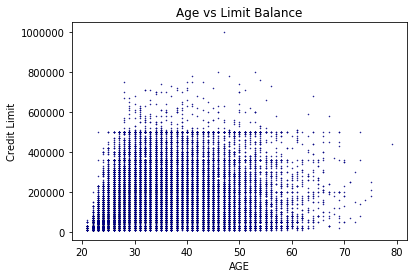

In [91]:
# Plot with small marker size
plt.plot( x, y, data=df, linestyle='', marker='o', markersize=0.5)
plt.xlabel('AGE')
plt.ylabel('Credit Limit')
plt.title('Age vs Limit Balance', loc='center')


Text(0.5,1,'Age vs Limit Balance')

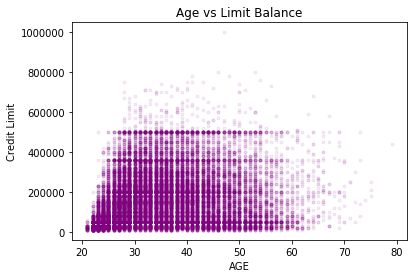

In [96]:
# Plot with small marker size

plt.plot( x, y, data=df, linestyle='', marker='o', markersize=3, alpha=0.07, color="purple")
plt.xlabel('AGE')
plt.ylabel('Credit Limit')
plt.title('Age vs Limit Balance', loc='center')
